In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('shooting.csv')

In [3]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [4]:
def normalize_data(column):
    return ((column - column.min()) / (column.max() - column.min())) * 9 + 1

In [5]:
data_normalized = data.copy()
data_normalized[numeric_columns] = data[numeric_columns].apply(normalize_data)

In [6]:
def plot_radar_chart(player_data, player_name):
    attributes = list(player_data.index)
    values = player_data.tolist()

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    ax.plot(np.deg2rad(np.linspace(0, 360, len(attributes), endpoint=False)), values, 'o-', linewidth=2)
    ax.fill(np.deg2rad(np.linspace(0, 360, len(attributes), endpoint=False)), values, alpha=0.25)
    
    ax.set_ylim(1, 10)

    ax.set_thetagrids(np.degrees(np.linspace(0, 2 * np.pi, len(attributes), endpoint=False)), attributes)
    ax.set_title(f'{player_name}', fontsize=16)
    ax.grid(True)

C:\Users\SAMPREET\AppData\Local\Temp\ipykernel_23420\1522682795.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})


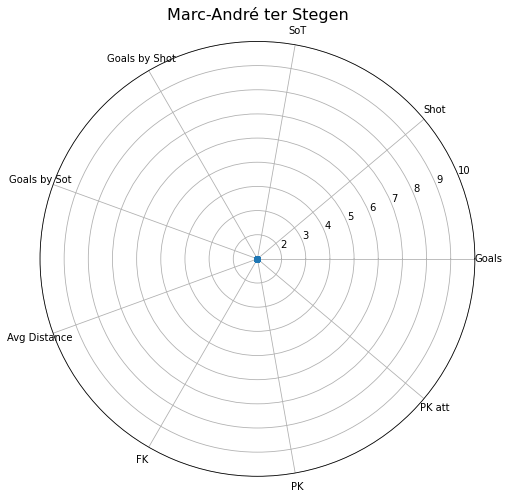

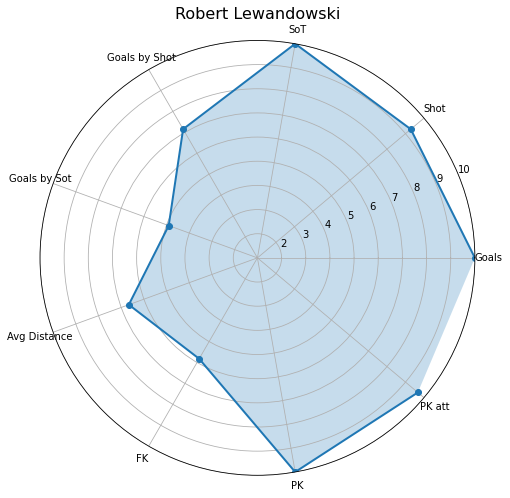

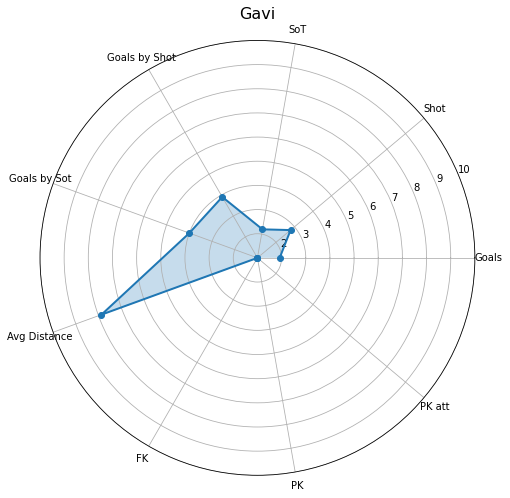

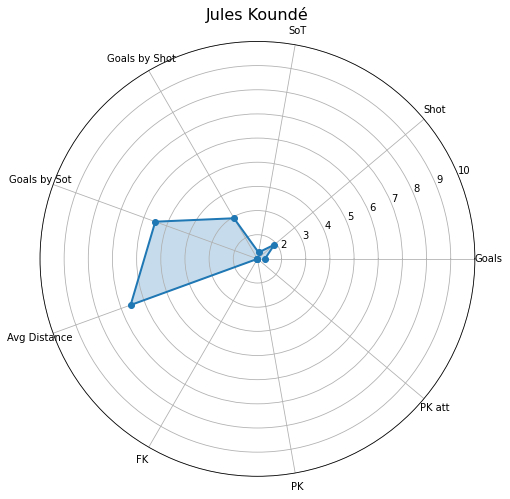

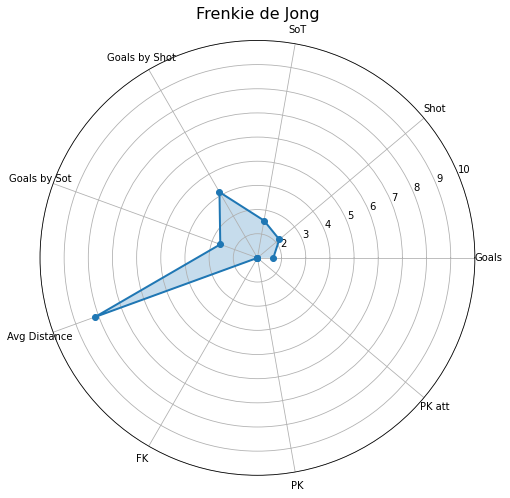

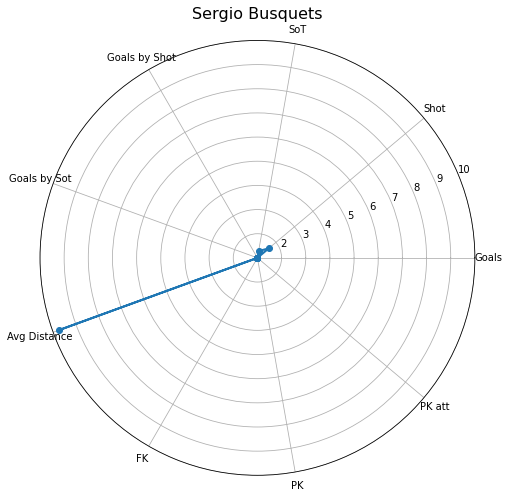

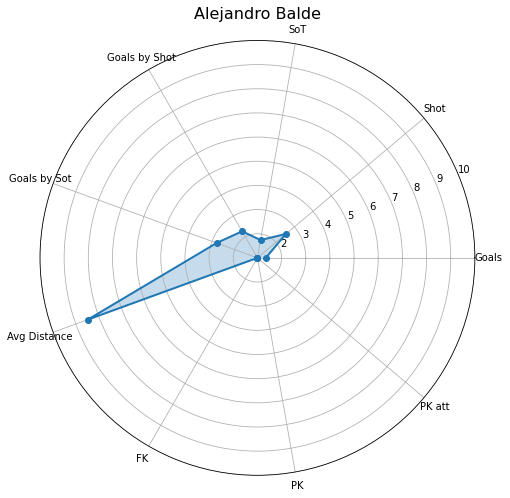

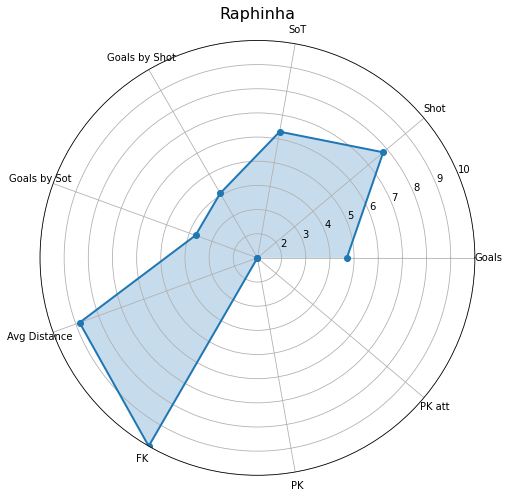

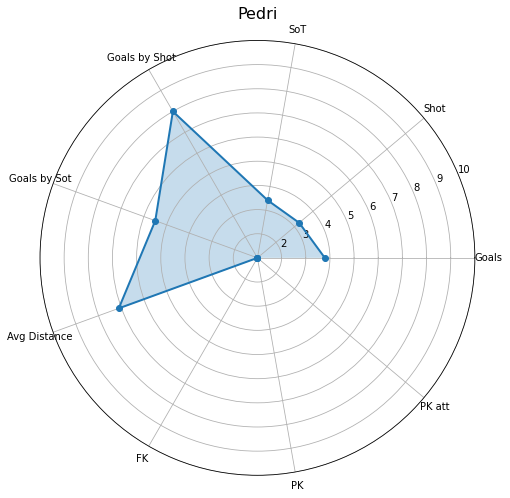

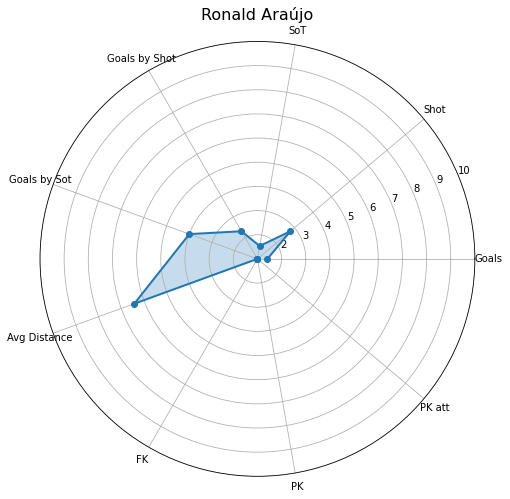

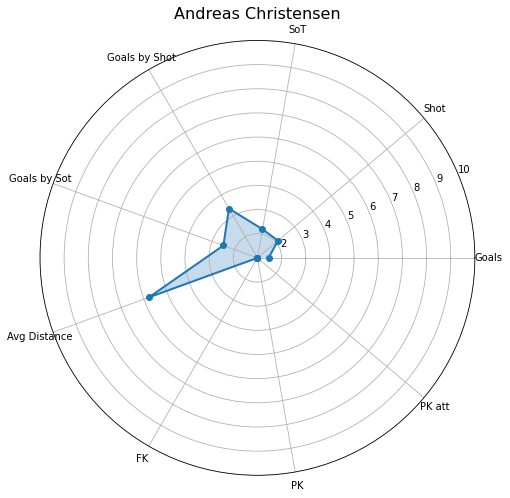

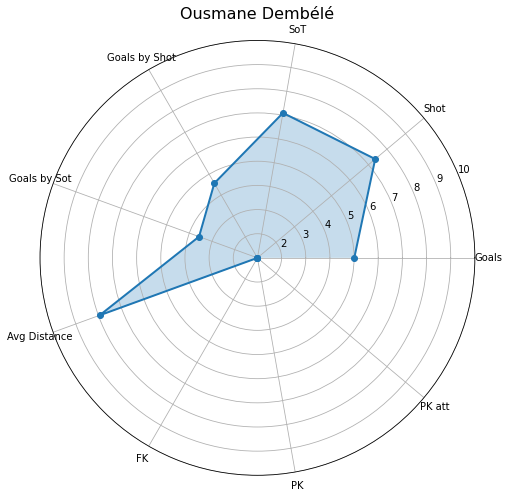

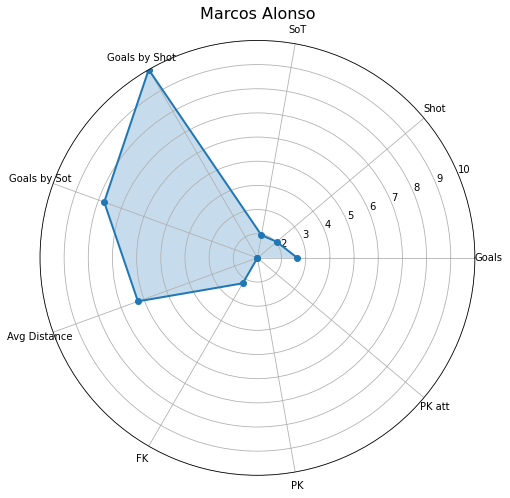

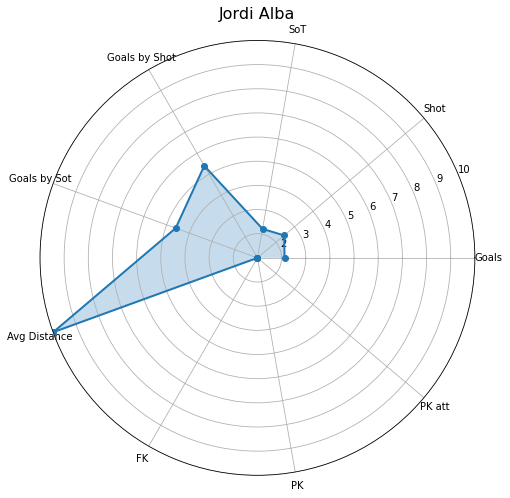

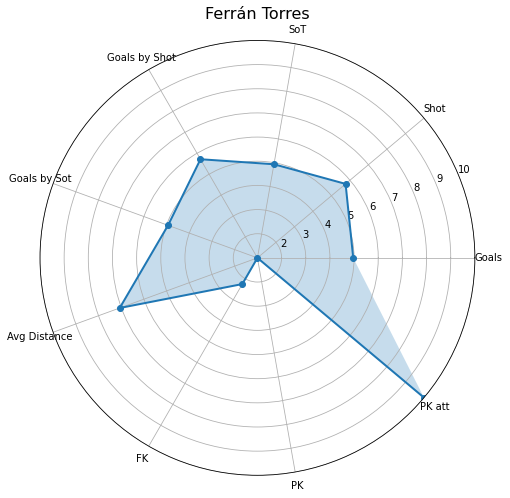

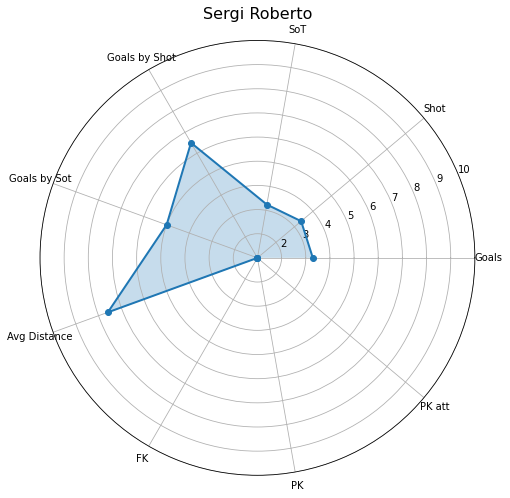

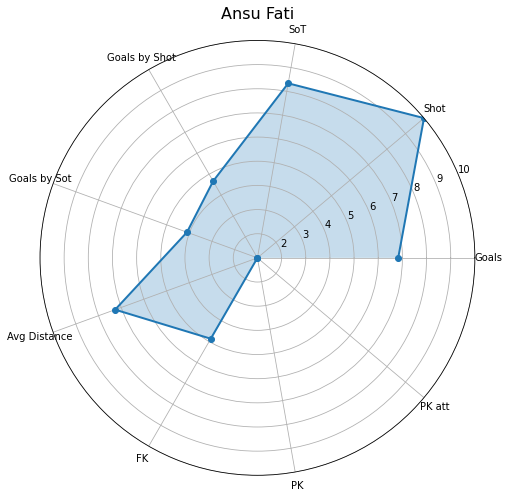

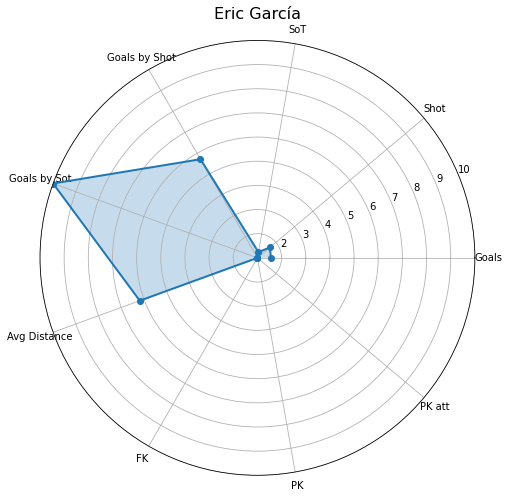

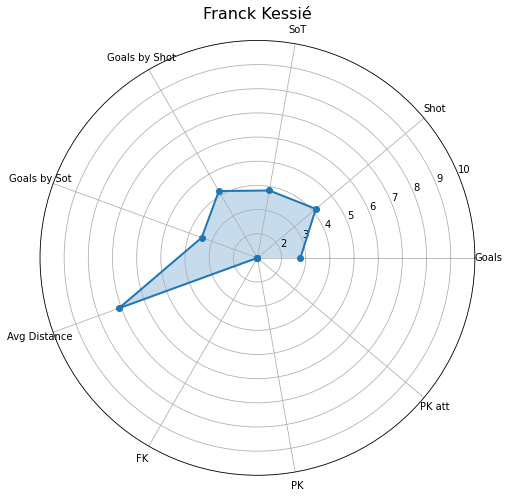

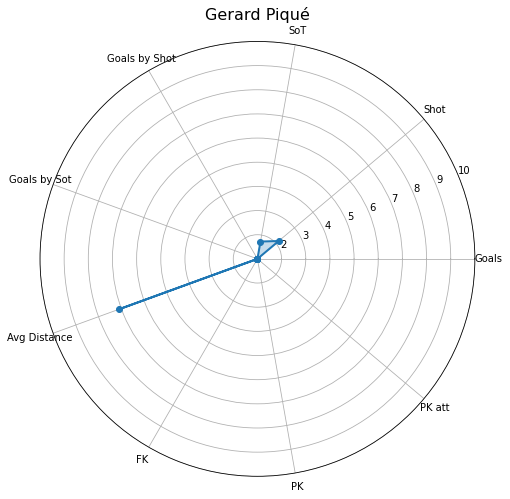

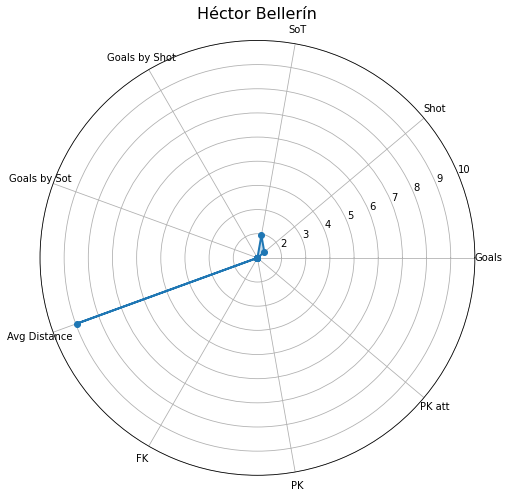

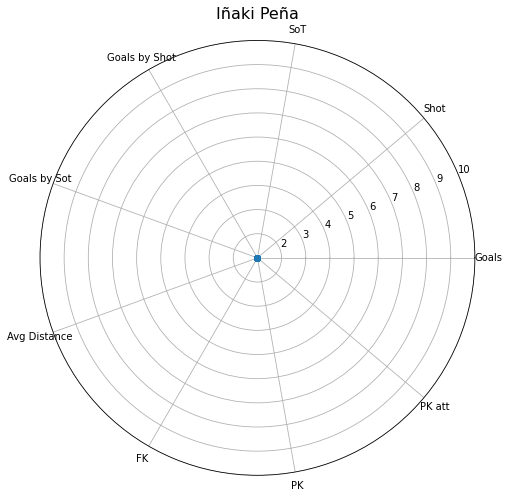

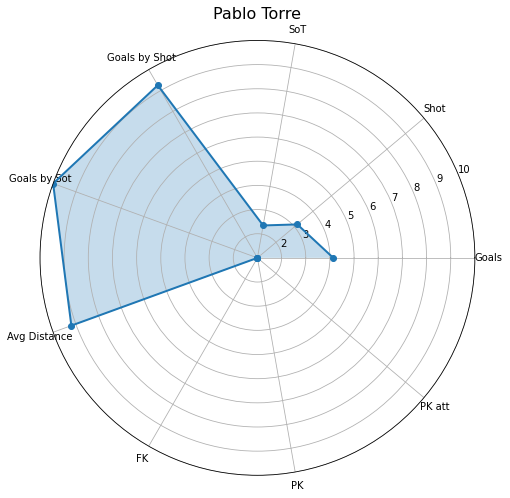

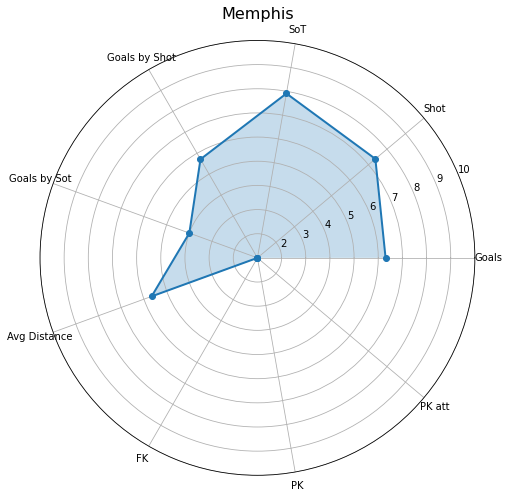

In [7]:
for index, row in data_normalized.iterrows():
    player_name = data.loc[index, 'Player']
    plot_radar_chart(row[numeric_columns], player_name)

plt.show()